In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

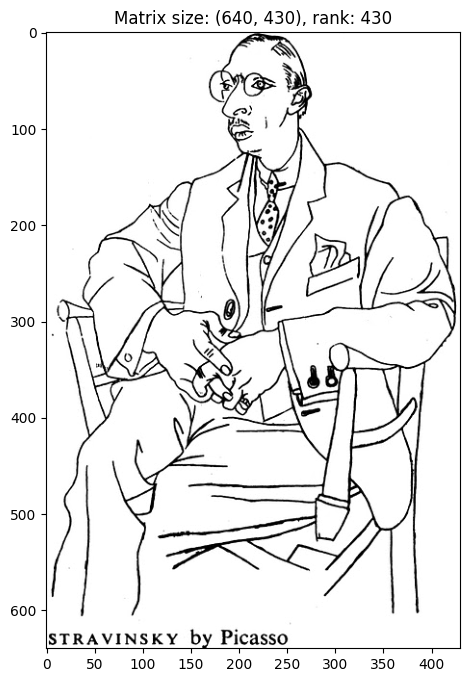

In [2]:
from skimage import io,color
url = 'https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png'

# import picture and downsample to 2D
strav = io.imread(url) / 255
#strav = color.rgb2gray(strav)

plt.figure(figsize=(8,8))
plt.imshow(strav,cmap='gray')
plt.title(f'Matrix size: {strav.shape}, rank: {np.linalg.matrix_rank(strav)}')
plt.show()

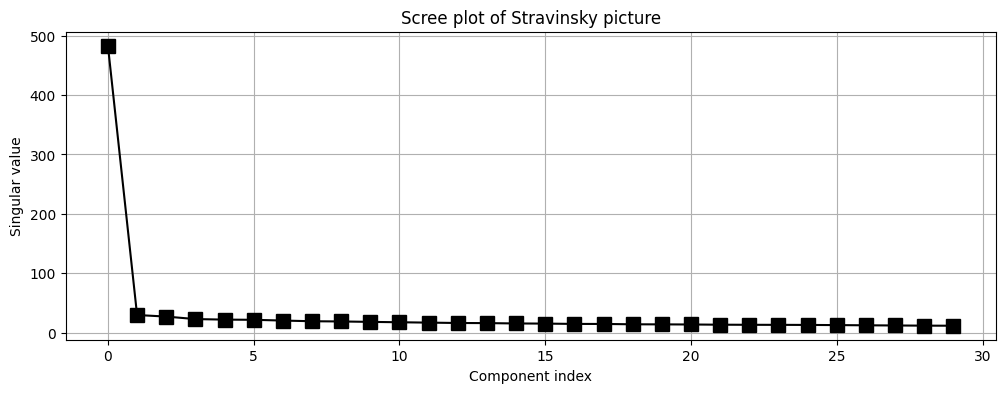

In [3]:
U,s,Vt = np.linalg.svd(strav)
S = np.zeros_like(strav)
np.fill_diagonal(S,s)

# show scree plot
plt.figure(figsize=(12,4))
plt.plot(s[:30],'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Singular value')
plt.title('Scree plot of Stravinsky picture')
plt.grid()
plt.show()

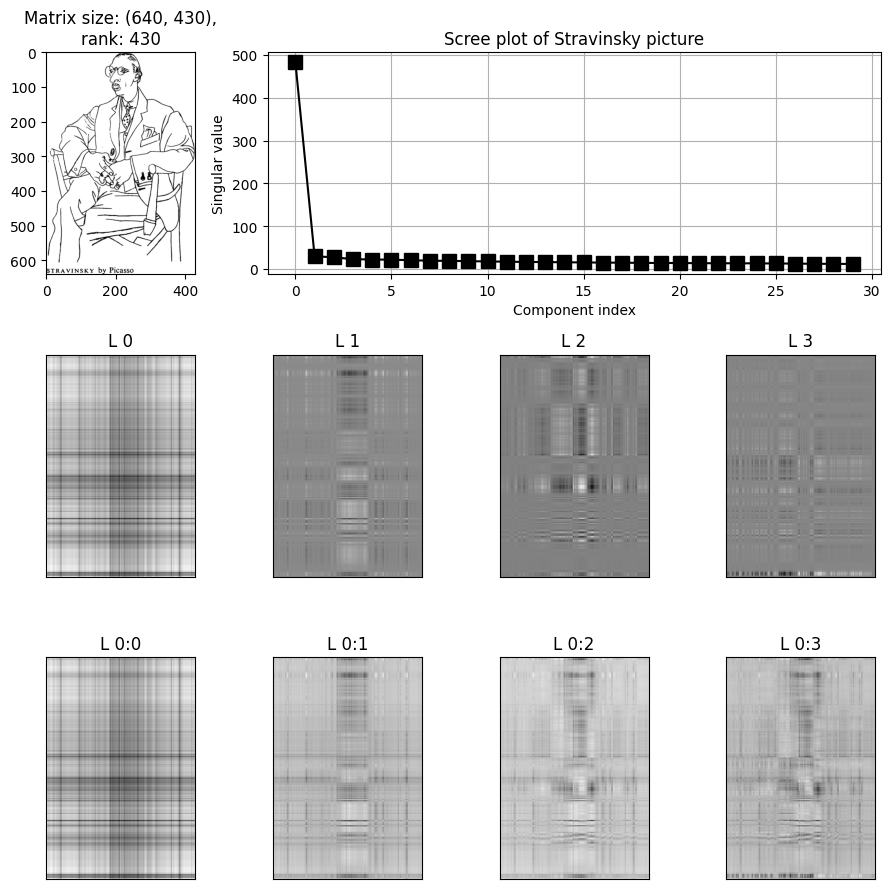

In [4]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(9,9))
gs = GridSpec(3,4,figure=fig)

# the image
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(strav,cmap='gray')
ax1.set_title(f'Matrix size: {strav.shape},\nrank: {np.linalg.matrix_rank(strav)}')

# scree plot
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(s[:30],'ks-',markersize=10)
ax2.set_xlabel('Component index')
ax2.set_ylabel('Singular value')
ax2.set_title('Scree plot of Stravinsky picture')
ax2.grid()


## now show the first N "layers" separately
numLayers = 4
rank1mats = np.zeros((numLayers,strav.shape[0],strav.shape[1]))


# the loop
for i in range(numLayers):
    
    # create this layer
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*s[i]
    
    # show this layer
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(rank1mats[i,:,:],cmap='gray')
    ax.set_title(f'L {i}')
    ax.set_xticks([]), ax.set_yticks([])

    # show the cumulative sum of layers
    ax = fig.add_subplot(gs[2,i])
    ax.imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray')
    ax.set_title(f'L 0:{i}')
    ax.set_xticks([]), ax.set_yticks([])


plt.tight_layout()

Exercise #11

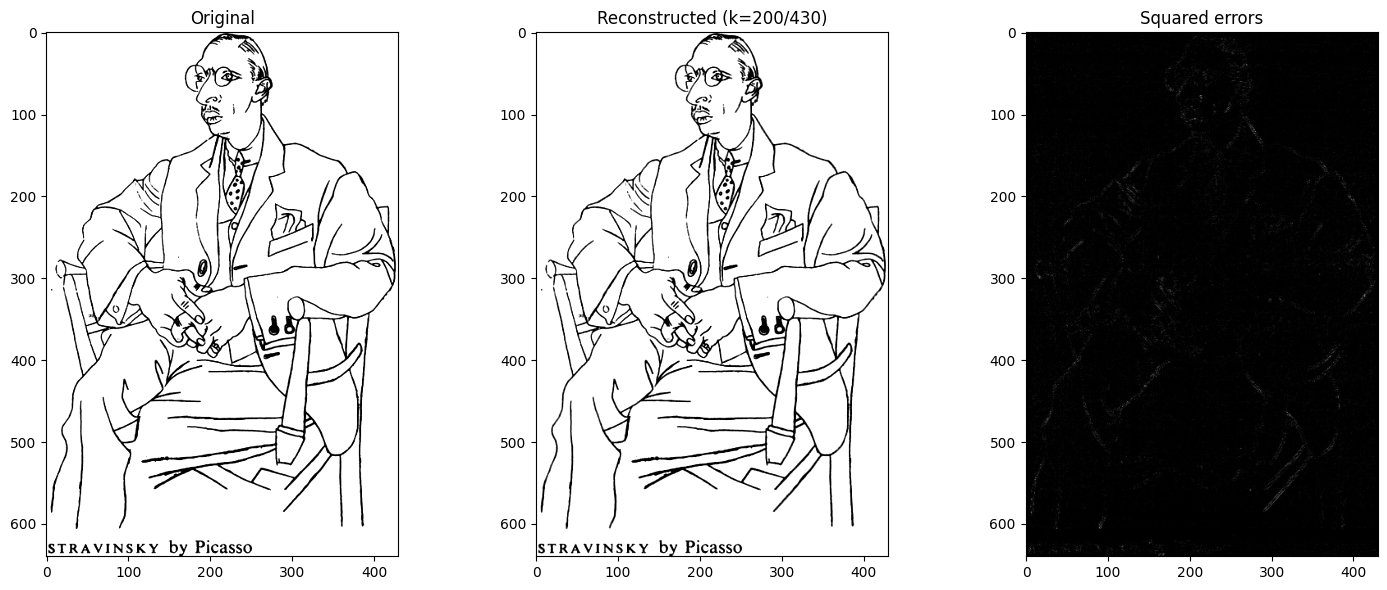

In [5]:
# Reconstruct based on first k layers

# number of components
k = 200

# reconstruction
stravRec = U[:,:k] @ S[:k,:k] @ Vt[:k,:]


# show the original, reconstructed, and error
_,axs = plt.subplots(1,3,figsize=(15,6))

axs[0].imshow(strav,cmap='gray',vmin=.1,vmax=.9)
axs[0].set_title('Original')

axs[1].imshow(stravRec,cmap='gray',vmin=.1,vmax=.9)
axs[1].set_title(f'Reconstructed (k={k}/{len(s)})')

axs[2].imshow((strav-stravRec)**2,cmap='gray',vmin=0,vmax=1e-1)
axs[2].set_title('Squared errors')

plt.tight_layout()


Exercise #12

In [6]:
k = range(1,len(s)+1)

In [7]:
kError = np.zeros(len(k))

In [8]:
for i in range(len(k)):
  
  # reconstruction
  stravRec = U[:,:k[i]] @ S[:k[i],:k[i]] @ Vt[:k[i],:]

  # compute and store the error
  kError[i] = np.sqrt(np.sum((strav-stravRec)**2))

Text(0.5, 1.0, 'Reconstruction accuracy')

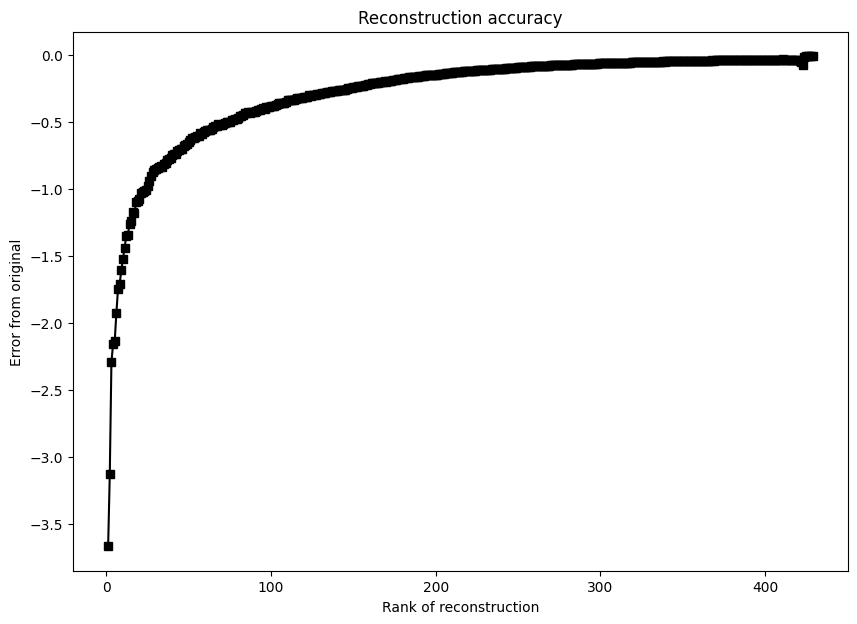

In [9]:
plt.figure(figsize=(10,7))
plt.plot(k[:-1],np.diff(kError),'ks-') # uncomment to show derivative (and comment out the previous line)
plt.xlabel('Rank of reconstruction')
plt.ylabel('Error from original')
plt.title('Reconstruction accuracy')

Text(0.5, 1.0, 'Reconstruction accuracy')

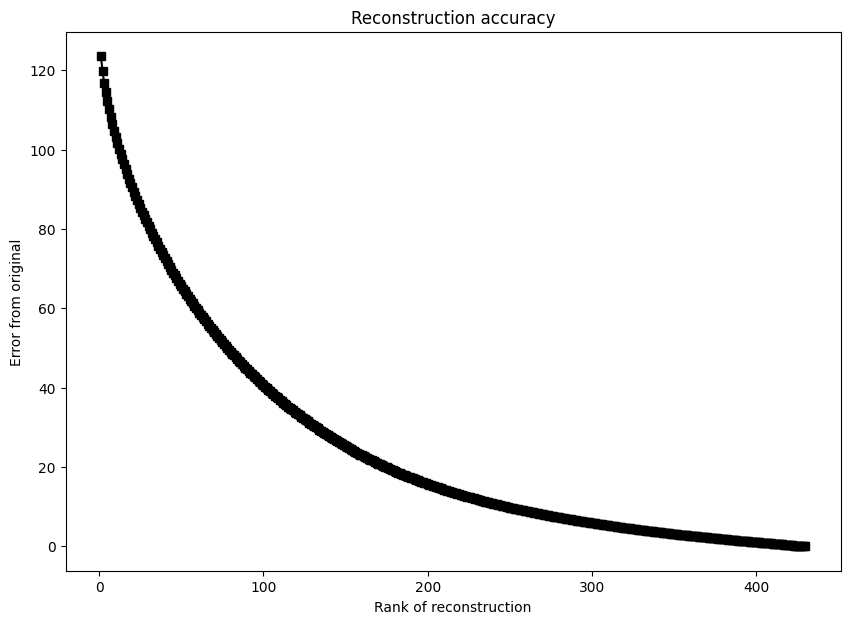

In [10]:
plt.figure(figsize=(10,7))
plt.plot(k,kError,'ks-')
plt.xlabel('Rank of reconstruction')
plt.ylabel('Error from original')
plt.title('Reconstruction accuracy')

Exercise #13

In [11]:
sinefreq = .02
sinephas = np.pi/6

In [12]:
[x,y] = np.meshgrid(np.linspace(-100,100,strav.shape[1]), np.linspace(-100,100,strav.shape[0]))
xp    = x*np.cos(sinephas) + y*np.sin(sinephas)
xp

array([[-136.60254038, -136.19879893, -135.79505748, ...,   35.79505748,
          36.19879893,   36.60254038],
       [-136.44604586, -136.04230441, -135.63856296, ...,   35.95155201,
          36.35529345,   36.7590349 ],
       [-136.28955133, -135.88580989, -135.48206844, ...,   36.10804653,
          36.51178798,   36.91552942],
       ...,
       [ -36.91552942,  -36.51178798,  -36.10804653, ...,  135.48206844,
         135.88580989,  136.28955133],
       [ -36.7590349 ,  -36.35529345,  -35.95155201, ...,  135.63856296,
         136.04230441,  136.44604586],
       [ -36.60254038,  -36.19879893,  -35.79505748, ...,  135.79505748,
         136.19879893,  136.60254038]])

In [13]:
sinimg = np.sin( 2*np.pi*sinefreq*xp)
sinimg

array([[ 0.99364729,  0.98666139,  0.97713626, ..., -0.97713626,
        -0.98666139, -0.99364729],
       [ 0.99124214,  0.98326951,  0.97276639, ..., -0.98112825,
        -0.98967169, -0.99566817],
       [ 0.98845364,  0.97949738,  0.96802032, ..., -0.98474081,
        -0.99229927, -0.997304  ],
       ...,
       [ 0.997304  ,  0.99229927,  0.98474081, ..., -0.96802032,
        -0.97949738, -0.98845364],
       [ 0.99566817,  0.98967169,  0.98112825, ..., -0.97276639,
        -0.98326951, -0.99124214],
       [ 0.99364729,  0.98666139,  0.97713626, ..., -0.97713626,
        -0.98666139, -0.99364729]])

In [14]:
sinimg = (sinimg-np.min(sinimg)) / (np.max(sinimg)-np.min(sinimg))

In [15]:
stravNoise = strav + sinimg
stravNoise = stravNoise-np.min(stravNoise)
stravNoise = stravNoise/np.max(stravNoise)

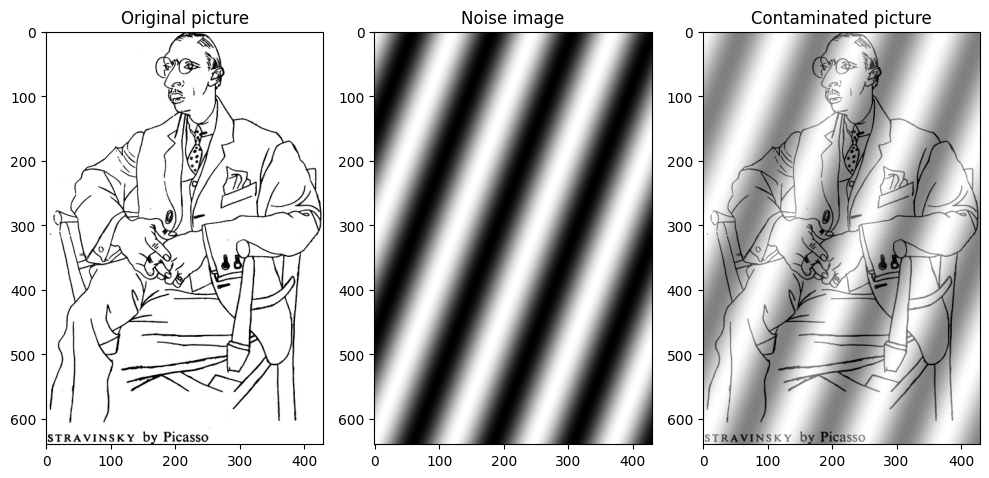

In [16]:
_,axs = plt.subplots(1,3,figsize=(10,7))
axs[0].imshow(strav,cmap='gray')
axs[0].set_title('Original picture')

axs[1].imshow(sinimg,cmap='gray')
axs[1].set_title('Noise image')

axs[2].imshow(stravNoise,cmap='gray')
axs[2].set_title('Contaminated picture')

plt.tight_layout()

In [17]:
Un,sn,Vtn = np.linalg.svd(stravNoise)
Sn = np.zeros_like(stravNoise)
np.fill_diagonal(Sn,sn)

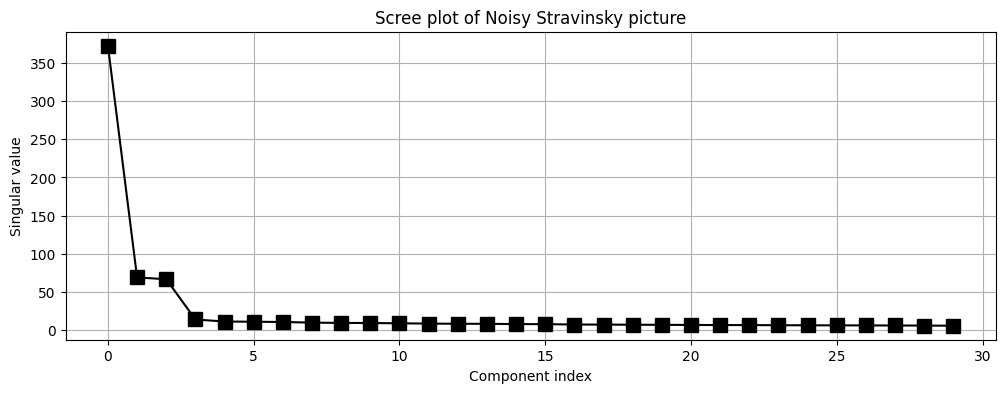

In [18]:
plt.figure(figsize=(12,4))
plt.plot(sn[:30],'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Singular value')
plt.title('Scree plot of Noisy Stravinsky picture')
plt.grid()
plt.show()

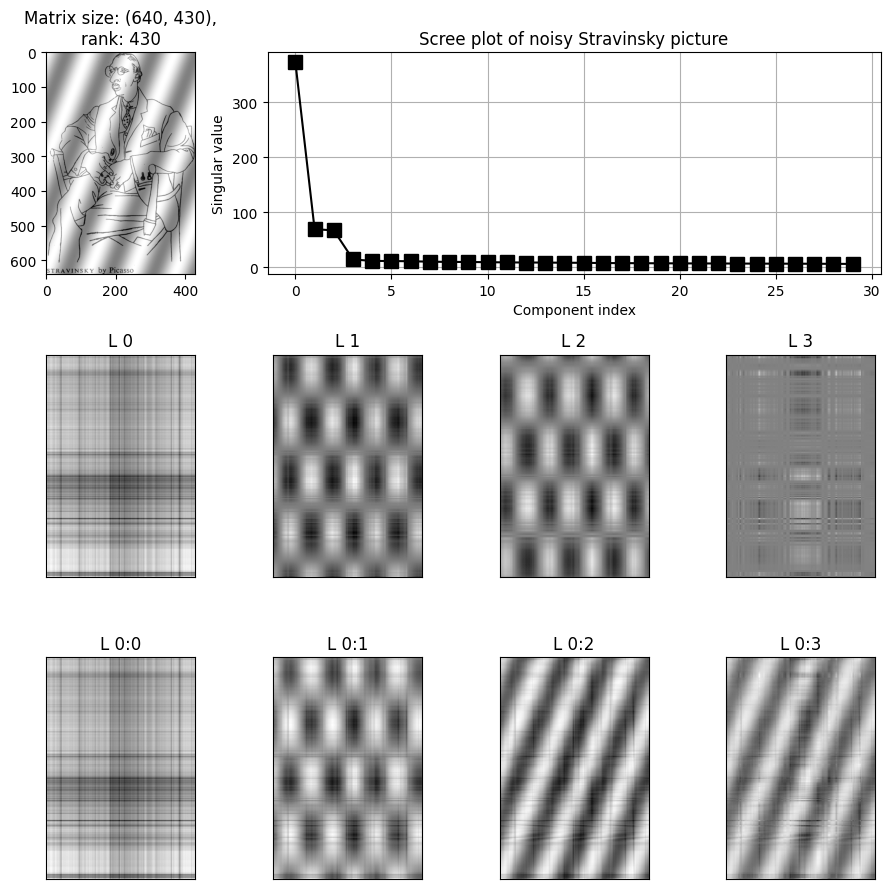

In [19]:
fig = plt.figure(figsize=(9,9))
gs = GridSpec(3,4,figure=fig)

# the image
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(stravNoise,cmap='gray')
ax1.set_title(f'Matrix size: {strav.shape},\nrank: {np.linalg.matrix_rank(stravNoise)}')

# scree plot
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(sn[:30],'ks-',markersize=10)
ax2.set_xlabel('Component index')
ax2.set_ylabel('Singular value')
ax2.set_title('Scree plot of noisy Stravinsky picture')
ax2.grid()


## now show the first N "layers" separately
numLayers = 4
rank1mats = np.zeros((numLayers,strav.shape[0],strav.shape[1]))


# the loop
for i in range(numLayers):
    
    # create this layer
    rank1mats[i,:,:] = np.outer(Un[:,i],Vtn[i,:])*sn[i]
    
    # show this layer
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(rank1mats[i,:,:],cmap='gray')
    ax.set_title(f'L {i}')
    ax.set_xticks([]), ax.set_yticks([])

    # show the cumulative sum of layers
    ax = fig.add_subplot(gs[2,i])
    ax.imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray')
    ax.set_title(f'L 0:{i}')
    ax.set_xticks([]), ax.set_yticks([])


plt.tight_layout()

Exercise #14

In [20]:
noiseComps = np.array([1,2])

In [21]:
stravRecNoise = Un[:,noiseComps] @ Sn[noiseComps,:][:,noiseComps] @ Vtn[noiseComps,:]

In [22]:
noNoiseCompsU = np.full(Un.shape[0],True)
noNoiseCompsU[noiseComps] = False

In [23]:
noNoiseCompsV = np.full(Vtn.shape[0],True)
noNoiseCompsV[noiseComps] = False

In [24]:
stravRecNoNoise = Un[:,noNoiseCompsU] @ Sn[noNoiseCompsU,:][:,noNoiseCompsV] @ Vtn[noNoiseCompsV,:]

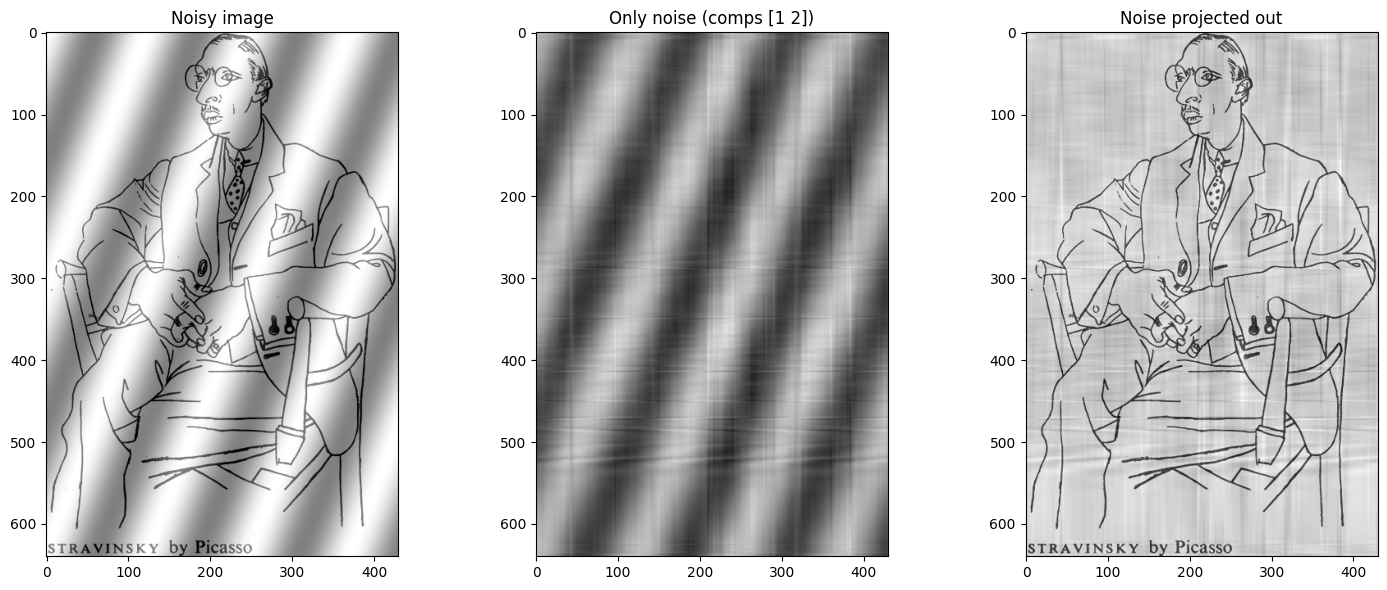

In [25]:
_,axs = plt.subplots(1,3,figsize=(15,6))

axs[0].imshow(stravNoise,cmap='gray')
axs[0].set_title('Noisy image')

axs[1].imshow(stravRecNoise,cmap='gray',vmin=-.5,vmax=.5)
axs[1].set_title(f'Only noise (comps {noiseComps})')

axs[2].imshow(stravRecNoNoise,cmap='gray',vmin=.1,vmax=.9)
axs[2].set_title('Noise projected out')

plt.tight_layout()

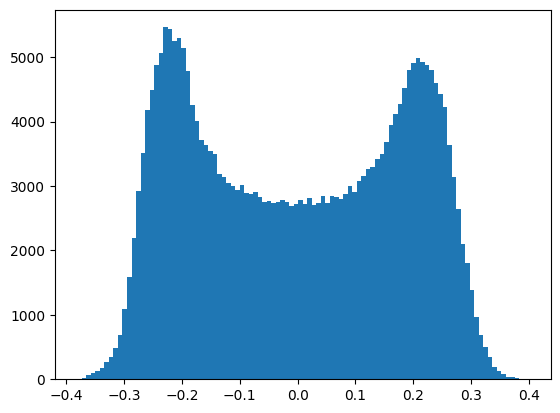

In [26]:
plt.hist(stravRecNoise.flatten(),100);